###**COFFEE SALES DATASET**- This dataset is set to be anlyzed and used to predict the type of of coffee, customers prefer given other features like; payment method etc. It will involve sections like;

1.   Data Importation, Cleaning and Summary Statistics
2.   Model Selection, Training, Evaluation.
1.   Model Visualization
[link text](https://www.kaggle.com/datasets/navjotkaushal/coffee-sales-dataset)





#**DATA LOADING, CLEANING AND STATISTICS**

##Data Loading

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Coffe_sales.csv to Coffe_sales.csv


In [ ]:
import pandas as pd
df = pd.read_csv('Coffe_sales.csv')
df.head()

,hour_of_day,cash_type,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort,Date,Time
0,10,card,38.7,Latte,Morning,Fri,Mar,5,3,2024-03-01,10:15:50.520000
1,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:19:22.539000
2,12,card,38.7,Hot Chocolate,Afternoon,Fri,Mar,5,3,2024-03-01,12:20:18.089000
3,13,card,28.9,Americano,Afternoon,Fri,Mar,5,3,2024-03-01,13:46:33.006000
4,13,card,38.7,Latte,Afternoon,Fri,Mar,5,3,2024-03-01,13:48:14.626000


##Data Cleaning

In [ ]:
df.isnull().sum()


,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


In [ ]:
(df==0).sum()

,0
hour_of_day,0
cash_type,0
money,0
coffee_name,0
Time_of_Day,0
Weekday,0
Month_name,0
Weekdaysort,0
Monthsort,0
Date,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   hour_of_day  3547 non-null   int64  
 1   cash_type    3547 non-null   object 
 2   money        3547 non-null   float64
 3   coffee_name  3547 non-null   object 
 4   Time_of_Day  3547 non-null   object 
 5   Weekday      3547 non-null   object 
 6   Month_name   3547 non-null   object 
 7   Weekdaysort  3547 non-null   int64  
 8   Monthsort    3547 non-null   int64  
 9   Date         3547 non-null   object 
 10  Time         3547 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 304.9+ KB


##Summary Descriptive Statistics (Pivot Tables)

In [ ]:
df.describe()

,hour_of_day,money,Weekdaysort,Monthsort
count,3547.000000,3547.000000,3547.000000,3547.000000
mean,14.185791,31.645216,3.845785,6.453905
std,4.234010,4.877754,1.971501,3.500754
min,6.000000,18.120000,1.000000,1.000000
25%,10.000000,27.920000,2.000000,3.000000
50%,14.000000,32.820000,4.000000,7.000000
75%,18.000000,35.760000,6.000000,10.000000
max,22.000000,38.700000,7.000000,12.000000


In [ ]:
pivot = df.pivot_table(index=['coffee_name'],
                       values=['hour_of_day', 'money', 'Weekdaysort', 'Monthsort'],
                       aggfunc=['sum', 'mean', 'median', 'min', 'max', 'std'],
                       )
print(pivot)

                          sum                                        mean  \
                    Monthsort Weekdaysort hour_of_day     money Monthsort   
coffee_name                                                                 
Americano                2952        2108        7437  14650.26  5.234043   
Americano with Milk      5329        3093       11018  24751.12  6.587145   
Cappuccino               3032        1941        7251  17439.14  6.238683   
Cocoa                    1503         884        3647   8521.16  6.288703   
Cortado                  2037        1199        3631   7384.86  7.097561   
Espresso                  822         526        1755   2690.28  6.372093   
Hot Chocolate            1920        1079        4505   9933.46  6.956522   
Latte                    5297        2811       11073  26875.30  6.997358   

                                                          median              \
                    Weekdaysort hour_of_day      money Monthsort Weekday

#**FEATURE ENGINEERING/SELECTION**

In [ ]:
X = df[['hour_of_day', 'money', 'Monthsort', 'Weekdaysort']]
y = df['coffee_name']


#**MODEL SELECTION, TRAINING, AND EVALUATION**

##Data Spilting - Training and Testing Data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print(pd.Series(y_train).value_counts(normalize=True))

coffee_name
Americano with Milk    0.227705
Latte                  0.211843
Americano              0.153683
Cappuccino             0.139584
Cortado                0.084244
Hot Chocolate          0.076137
Cocoa                  0.068382
Espresso               0.038421
Name: proportion, dtype: float64


In [ ]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

          Americano       0.81      0.78      0.79       128
Americano with Milk       0.99      0.99      0.99       163
         Cappuccino       0.40      0.38      0.39        90
              Cocoa       0.26      0.16      0.19        45
            Cortado       0.48      0.52      0.50        48
           Espresso       1.00      0.95      0.97        20
      Hot Chocolate       0.43      0.22      0.29        60
              Latte       0.48      0.65      0.55       156

           accuracy                           0.65       710
          macro avg       0.61      0.58      0.59       710
       weighted avg       0.64      0.65      0.64       710



In [ ]:
importance = model.feature_importances_
feature_imp = pd.DataFrame({'Feature': X.columns,
                            'Importance': importance})
feature_imp = feature_imp.sort_values(by='Importance', ascending=False)
feature_imp.head()

,Feature,Importance
1,money,0.600000
2,Monthsort,0.184780
0,hour_of_day,0.125275
3,Weekdaysort,0.089945


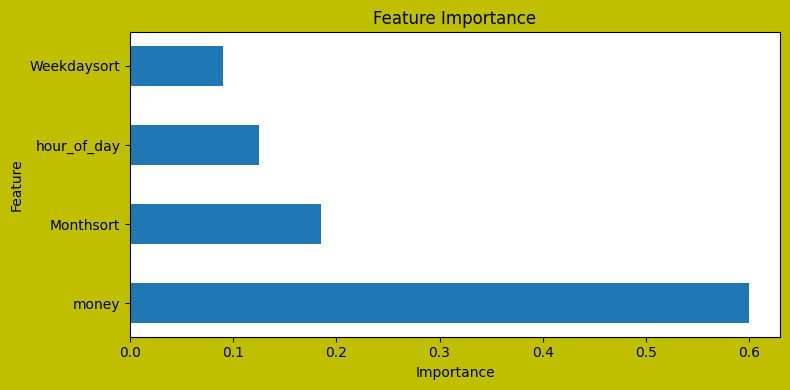

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 4), facecolor='y')
plt.barh(feature_imp['Feature'], feature_imp['Importance'], data=feature_imp, height=0.5)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()